# TASK: To Perform Exploratory Data Analysis On Loan Data Set

Example of a dataset is taken from a recent Analytics Vidhya Website’s competition — Loan Default Challenge.
Dataset - Loan Approval
The sample dataset contains 29 columns and 2999 rows.

Steps in Data Exploration and Preprocessing:
1. Identification of variables and data types
2. Analyzing the basic metrics
3. Non-Graphical Univariate Analysis
4. Graphical Univariate Analysis
5. Bivariate Analysis
6. Variable transformations
7. Missing value treatment
8. Outlier treatment
9. Correlation Analysis
10. Dimensionality Reduction

Once the type of variables is identified, the next step is to identify the Predictor (Inputs) and Target (output) variables.

In the above dataset, the numerical variables are,

Unique ID, disbursed_amount, asset_cost, ltv, Current_pincode_ID, PERFORM_CNS.SCORE, PERFORM_CNS.SCORE.DESCRIPTION, PRI.NO.OF.ACCTS, PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS, PRI.CURRENT.BALANCE, PRI.SANCTIONED.AMOUNT, PRI.DISBURSED.AMOUNT, NO.OF_INQUIRIES

And the categorical variables are,

branch_id, supplier_id, manufacturer_id, Date.of.Birth, Employment.Type, DisbursalDate, State_ID, Employee_code_ID, MobileNo_Avl_Flag, Aadhar_flag, PAN_flag, VoterID_flag, Driving_flag, Passport_flag, loan_default

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv("E:\Jupyter Notebook\EDA On Loan Approval Dataset\Loan_Approval_train_sample.csv")
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1


In [7]:
train.dtypes

UniqueID                           int64
disbursed_amount                   int64
asset_cost                         int64
ltv                              float64
branch_id                          int64
supplier_id                        int64
manufacturer_id                    int64
Current_pincode_ID                 int64
Date.of.Birth                     object
Employment.Type                   object
DisbursalDate                     object
State_ID                           int64
Employee_code_ID                   int64
MobileNo_Avl_Flag                  int64
Aadhar_flag                        int64
PAN_flag                           int64
VoterID_flag                       int64
Driving_flag                       int64
Passport_flag                      int64
PERFORM_CNS.SCORE                  int64
PERFORM_CNS.SCORE.DESCRIPTION     object
PRI.NO.OF.ACCTS                    int64
PRI.ACTIVE.ACCTS                   int64
PRI.OVERDUE.ACCTS                  int64
PRI.CURRENT.BALA

Both Date.of.Birth and DisbursalDate are of the object type. We have to convert it to DateTime type during data cleaning.

In [8]:
train.shape

(2998, 29)

### Statistical Summary

In [6]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2.998000e+03,2.998000e+03,2998.000000,2998.000000
mean,534657.950967,50783.144096,71606.185457,73.859143,49.978319,18687.033356,67.464310,4396.965644,7.785190,1033.179119,...,0.002001,300.312208,2.298866,0.975984,0.149767,1.178554e+05,1.553791e+05,1.545087e+05,0.214476,0.194129
std,69206.613774,10608.311573,13474.955047,11.842990,34.925630,3248.401481,20.657815,2650.602941,4.268893,524.875745,...,0.044699,342.461885,4.515137,1.739861,0.531225,5.487249e+05,6.430253e+05,6.424348e+05,0.723570,0.395595
min,417430.000000,13990.000000,39605.000000,17.050000,3.000000,12534.000000,45.000000,4.000000,1.000000,83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.934200e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,471267.250000,45110.500000,64338.000000,67.822500,20.000000,16067.000000,45.000000,1051.000000,5.000000,624.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,533950.500000,51055.500000,68377.000000,75.790000,36.000000,17906.000000,86.000000,6181.000000,6.000000,1120.000000,...,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,596809.500000,56513.000000,74694.000000,82.597500,63.000000,22637.000000,86.000000,6537.000000,10.000000,1464.000000,...,0.000000,691.000000,3.000000,1.000000,0.000000,3.133325e+04,5.800000e+04,5.649975e+04,0.000000,0.000000
max,658623.000000,106648.000000,178832.000000,94.990000,142.000000,24767.000000,145.000000,7149.000000,18.000000,1998.000000,...,1.000000,879.000000,56.000000,21.000000,14.000000,2.055171e+07,2.260899e+07,2.262360e+07,12.000000,1.000000


## Non-Graphical Univariate Analysis:

### Count Of Unique Values

In [9]:
train['loan_default'].value_counts()

0    2416
1     582
Name: loan_default, dtype: int64

### To get the list & number of unique values:

In [10]:
train['branch_id'].nunique()

15

In [11]:
train['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36], dtype=int64)

### Filtering Bases On A Condition

In [14]:
train[train['Employment.Type'] == "Salaried"]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,818,A-Very Low Risk,1,0,0,0,0,0,0,0
11,486821,64769,74190,89.23,67,22807,45,1446,07-09-84,Salaried,...,786,B-Very Low Risk,3,2,0,676,36154,23374,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,452352,48558,70613,72.93,36,23437,51,6610,01-01-67,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
2978,452343,66100,96092,71.91,36,23437,51,6579,01-01-89,Salaried,...,643,G-Low Risk,1,1,0,21411,25000,25000,0,1
2986,464672,54273,68316,83.44,36,18461,45,6614,01-01-69,Salaried,...,538,J-High Risk,12,4,1,1092473,1240000,1240000,0,0
2990,426595,58397,86325,70.43,36,22412,48,6616,01-01-89,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0


In [20]:
train[(train['Employment.Type'] == "Salaried") & (train["branch_id"] == 36) & (train['manufacturer_id'] == 48)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
2582,455806,56889,92677,66.00,36,24165,48,6678,01-01-71,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
2621,523794,62682,90082,74.93,36,21251,48,6657,01-01-67,Salaried,...,825,A-Very Low Risk,2,1,0,26255,35000,35000,0,0
2639,636991,63847,91787,70.71,36,24165,48,6654,23-08-97,Salaried,...,15,Not Scored: Sufficient History Not Available,1,1,0,19,19,19,0,1
2653,573066,66218,101779,70.00,36,24165,48,6663,01-01-62,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,1
2657,519428,68877,115580,64.02,36,24165,48,6680,31-12-85,Salaried,...,706,D-Very Low Risk,2,1,0,267579,300000,300000,0,0
2658,542842,67382,96281,71.15,36,21251,48,6678,10-06-94,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
2664,640697,59259,90520,66.28,36,21251,48,6668,12-07-64,Salaried,...,636,G-Low Risk,2,0,0,0,0,0,0,0
2675,441216,56306,86911,70.00,36,24165,48,6657,01-01-76,Salaried,...,16,Not Scored: No Activity seen on the customer (...,7,1,0,46833,110000,110000,0,1
2709,509567,54101,86911,67.00,36,24165,48,6654,02-02-91,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
2714,419851,63098,92369,73.62,36,21251,48,6665,20-12-94,Salaried,...,737,C-Very Low Risk,1,1,0,30460,43049,43049,0,0


### Finding Null Values

In [22]:
train.isnull().sum()

UniqueID                          0
disbursed_amount                  0
asset_cost                        0
ltv                               0
branch_id                         0
supplier_id                       0
manufacturer_id                   0
Current_pincode_ID                0
Date.of.Birth                     0
Employment.Type                  48
DisbursalDate                     0
State_ID                          0
Employee_code_ID                  0
MobileNo_Avl_Flag                 0
Aadhar_flag                       0
PAN_flag                          0
VoterID_flag                      0
Driving_flag                      0
Passport_flag                     0
PERFORM_CNS.SCORE                 0
PERFORM_CNS.SCORE.DESCRIPTION     0
PRI.NO.OF.ACCTS                   0
PRI.ACTIVE.ACCTS                  0
PRI.OVERDUE.ACCTS                 0
PRI.CURRENT.BALANCE               0
PRI.SANCTIONED.AMOUNT             0
PRI.DISBURSED.AMOUNT              0
NO.OF_INQUIRIES             

In [27]:
# Another way for Finding Null Values
train.apply(lambda x: sum(x.isnull()), axis=0)

UniqueID                          0
disbursed_amount                  0
asset_cost                        0
ltv                               0
branch_id                         0
supplier_id                       0
manufacturer_id                   0
Current_pincode_ID                0
Date.of.Birth                     0
Employment.Type                  48
DisbursalDate                     0
State_ID                          0
Employee_code_ID                  0
MobileNo_Avl_Flag                 0
Aadhar_flag                       0
PAN_flag                          0
VoterID_flag                      0
Driving_flag                      0
Passport_flag                     0
PERFORM_CNS.SCORE                 0
PERFORM_CNS.SCORE.DESCRIPTION     0
PRI.NO.OF.ACCTS                   0
PRI.ACTIVE.ACCTS                  0
PRI.OVERDUE.ACCTS                 0
PRI.CURRENT.BALANCE               0
PRI.SANCTIONED.AMOUNT             0
PRI.DISBURSED.AMOUNT              0
NO.OF_INQUIRIES             

### Data Type Conversion using to_datetime() and astype() methods

In [28]:
# to_datetime converts any categorical data into a datatime object
train['Date.of.Birth']= pd.to_datetime(train['Date.of.Birth'])

In [33]:
# astype converts the data to the required datatype
train['ltv'] = train['ltv'].astype('int64')

In [32]:
train.dtypes

UniqueID                                  int64
disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                 int64
supplier_id                               int64
manufacturer_id                           int64
Current_pincode_ID                        int64
Date.of.Birth                    datetime64[ns]
Employment.Type                          object
DisbursalDate                            object
State_ID                                  int64
Employee_code_ID                          int64
MobileNo_Avl_Flag                         int64
Aadhar_flag                               int64
PAN_flag                                  int64
VoterID_flag                              int64
Driving_flag                              int64
Passport_flag                             int64
PERFORM_CNS.SCORE                         int64
PERFORM_CNS.SCORE.DESCRIPTION           

In [34]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89,67,22807,45,1441,1984-01-01,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73,67,22807,45,1502,1985-07-31,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89,67,22807,45,1497,1985-08-24,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88,67,22807,45,1501,1993-12-30,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88,67,22807,45,1495,1977-09-12,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1


## Graphical Univariate Analysis:

### HISTOGRAM
Histograms two important things we can learn from a histogram:
1. distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
2. To identify outliers — Extremely low or high values that do not fall near any other data points.

<AxesSubplot:>

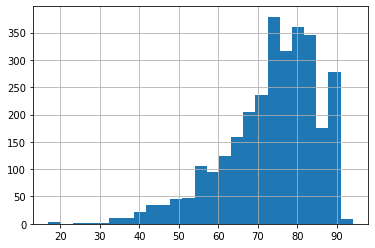

In [35]:
train['ltv'].hist(bins=25)

<AxesSubplot:>

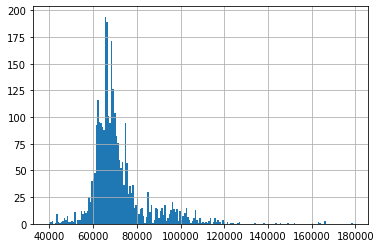

In [36]:
train["asset_cost"].hist(bins=200)

The above one is a normal distribution with a few outliers in the right end.

### BOX PLOT

<AxesSubplot:>

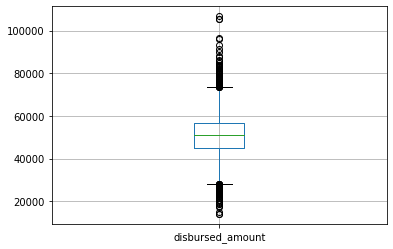

In [38]:
train.boxplot(column = "disbursed_amount")

Here we can see that the mean is around 50000. There are also few outliers at 60000 and 1000000, which should be treated in the preprocessing stage.

<AxesSubplot:title={'center':'disbursed_amount'}, xlabel='Employment.Type'>

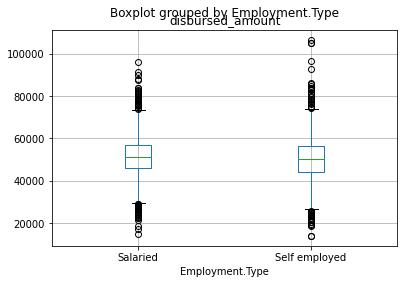

In [40]:
train.boxplot(column="disbursed_amount", by = "Employment.Type")

## Count Plot

<AxesSubplot:xlabel='loan_default', ylabel='count'>

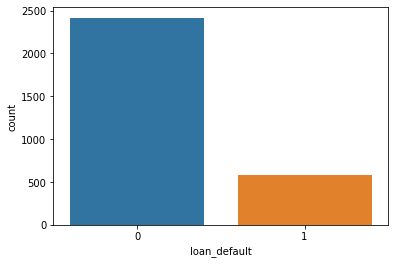

In [43]:
sns.countplot(train.loan_default)

<AxesSubplot:xlabel='manufacturer_id', ylabel='count'>

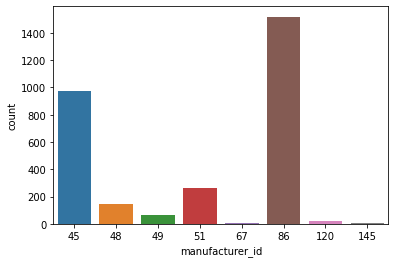

In [45]:
sns.countplot(train.manufacturer_id)